Etape 1 : Set up un environnement virtuel et installation de tensorflow, dans le terminal les commandes sont : 

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

print(tf.__version__)

2.16.1


Etape 2 : On importe les données de Keras. Chaque catégorie est remplacer par un nombre donc il faudra une table de conversion (class_name)

In [50]:
fashion_mnist = tf.keras.datasets.fashion_mnist #Importation de la database Fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #Chargement de la database
train_images = train_images/255 #Normalisation des pixels 
print(type(train_images))
test_images = test_images/255 #Idem

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #Conversion des train_labels en catégorie lisible


print ('Nombre d image de la database : ', train_images.shape[0])
print('Taille de toutes les images de la database : ', train_images.shape[1:3])

<class 'numpy.ndarray'>
Nombre d image de la database :  60000
Taille de toutes les images de la database :  (28, 28)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


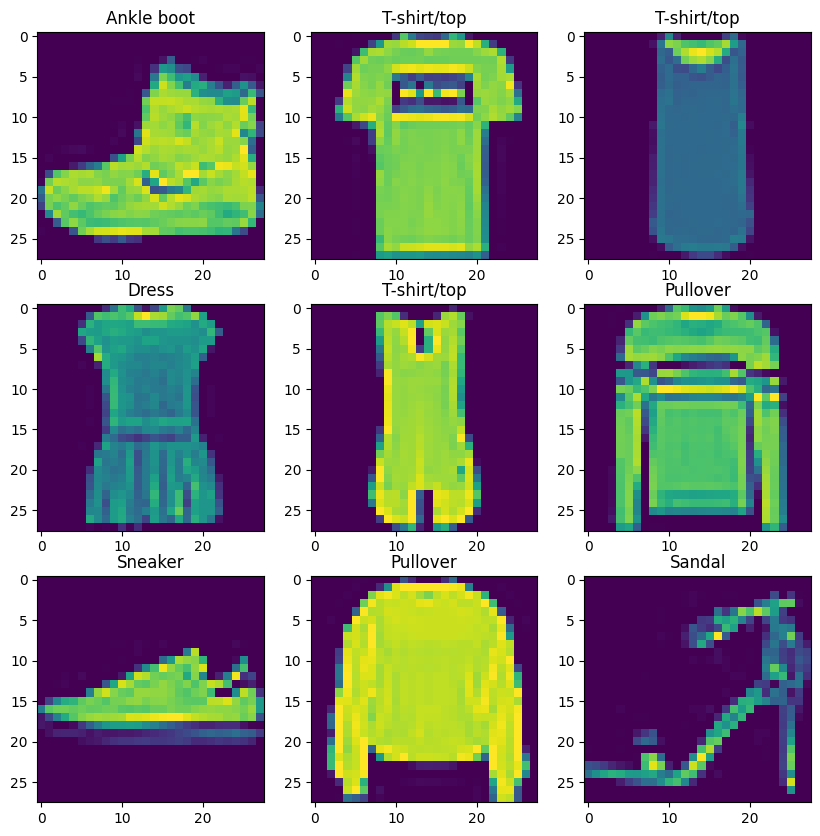

In [102]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    print(type(train_images[i]))
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
plt.show()

WTF c'est quoi cette couleur ? Ah ok en fait c'est normal, les pixels sont pas normalisé donc il fait nimp sur les couleurs, on va normaliser

Ben non c'est une idée de merde allons voir sur internet. Bon askip c'est normal c'est la manière de lire les photo qui de matplotlib mais je comprends pas bien pourquoi on va move on, on reviendra. Mais c'est important de normaliser les pixels donc je vais commenter cette partie et le faire dans le main 

Etape 3 : Construction du modèle 

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #La taille est cohérente avec notre database 
    tf.keras.layers.Dense(128, activation='relu'), #dense = C'est quand toutes tes couches intermédiaires sont reliées les unes aux autres, pas très efficace
    #relu : Rectified Linear Unit, c'est un type de fonction d'activation, faudra aller voir plus tard ce que c'est 
    tf.keras.layers.Dense(10)
])

Etape 4 : Compilation du modèle 

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Se renseigner sur ce type de fonction de perte 
              metrics=['accuracy'])

Etape 5 : Formation du modèle 

In [14]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9128 - loss: 0.2303
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9158 - loss: 0.2245
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9181 - loss: 0.2155
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9216 - loss: 0.2078
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9239 - loss: 0.2000
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9272 - loss: 0.1948
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9276 - loss: 0.1944
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9312 - loss: 0.1868
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9313 - loss: 0.1816
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9332 - loss: 0.1758
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9323 - loss: 0.1766
Epoch 12/50
1875/1875 ━━━━━━━━

Etape 6 : Création d'un modèle de prédiction facilement interprétable 

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Etape 7 : Prédiction à partir des images de tests qu'on avait prévus 

In [16]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


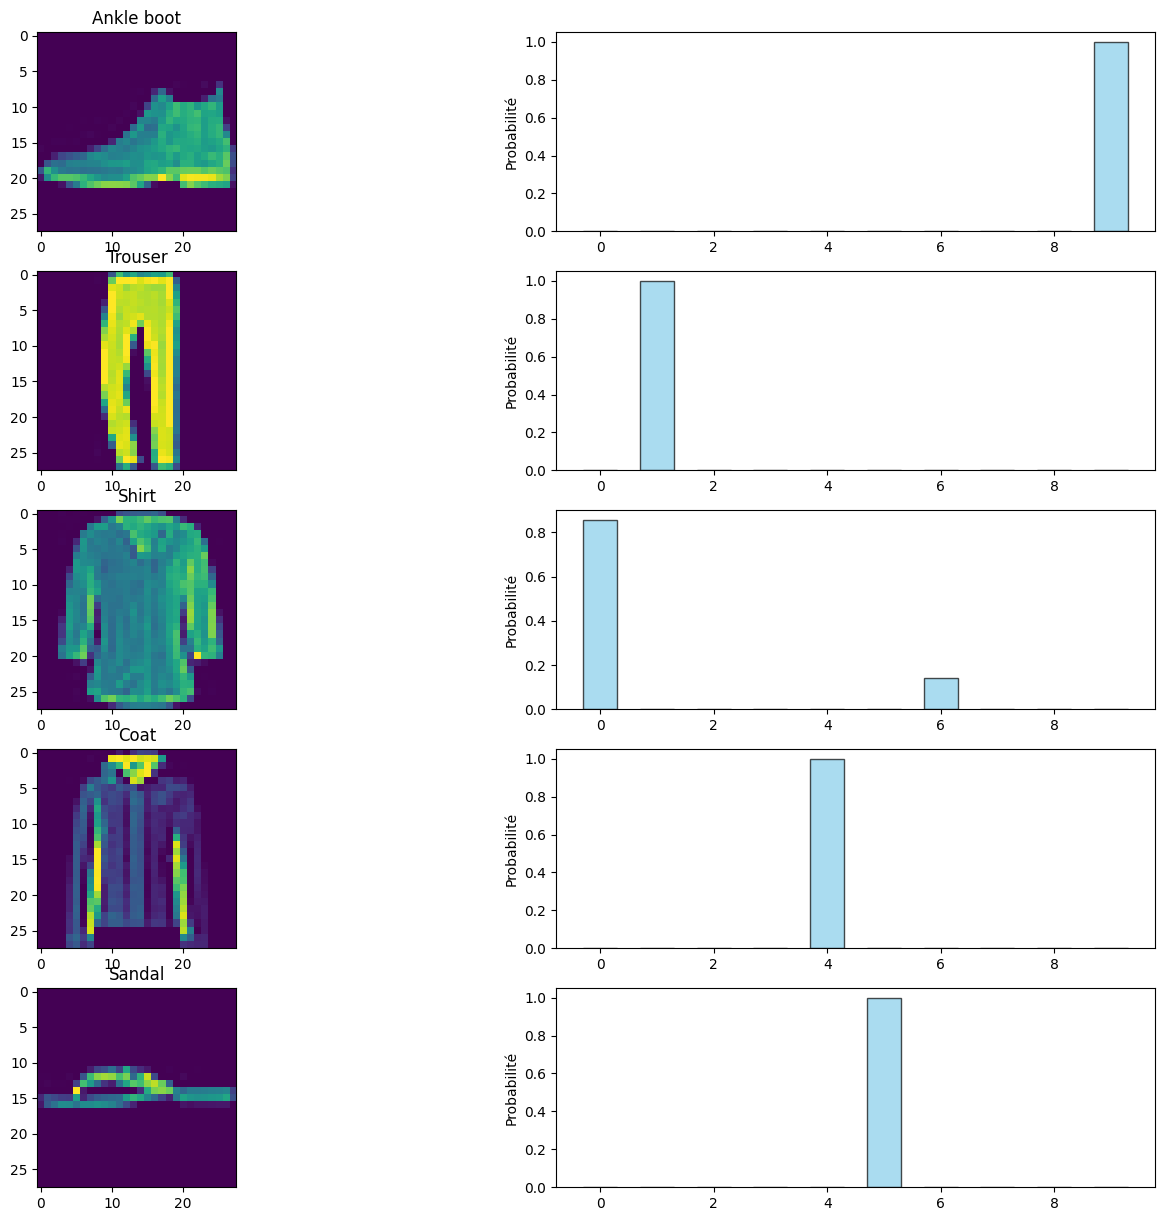

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [26]:
plt.figure(figsize=(17, 15))

i=0
while i<10 : 
    plt.subplot(5,2,i+1)
    if i%2 == 0 : 
        plt.imshow(test_images[i])
        plt.title(class_names[test_labels[i]])
    else : 
        plt.bar(range(0,10), predictions[i-1], color='skyblue', edgecolor='black', width=0.6, align='center', alpha=0.7)
        plt.ylabel('Probabilité')
    i+=1
    
plt.show()
print(class_names)

In [27]:
print('Shape de test_images : ', test_images.shape)
print('Shape de prediction : ', predictions.shape)

Shape de test_images :  (10000, 28, 28)
Shape de prediction :  (10000, 10)


Taux de réussite :  89.09  %


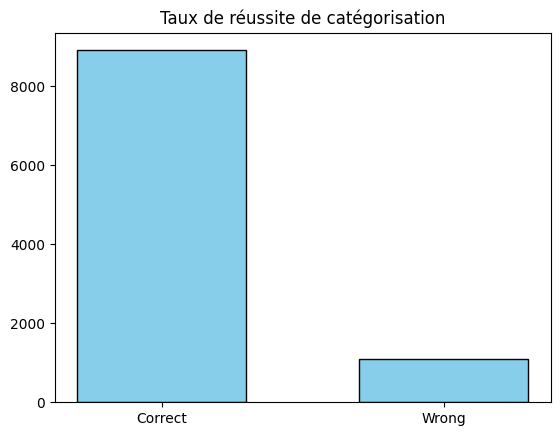

In [28]:
cat_predict = [] #Catégorie prédite par le modele probability_model
for i in range (predictions.shape[0]) :
    cat_predict.append(np.argmax(predictions[i,:]))

Correct = 0
for i in range (len(cat_predict)) : 
    if cat_predict[i] == test_labels[i] : 
        Correct +=1

plt.bar(['Correct','Wrong'],[Correct, len(cat_predict)-Correct],color='skyblue', edgecolor='black', width=0.6, align='center')
plt.title('Taux de réussite de catégorisation')
print('Taux de réussite : ',(Correct*100)/len(cat_predict),' %')

Conclusion : 90% de réussite c'est très bon 

Etape 8 : Utiliser le modèle pour une photo qui ne sera pas dans la base de donnée

In [31]:
pwd

'C:\\Users\\TheoN\\Neural Network'

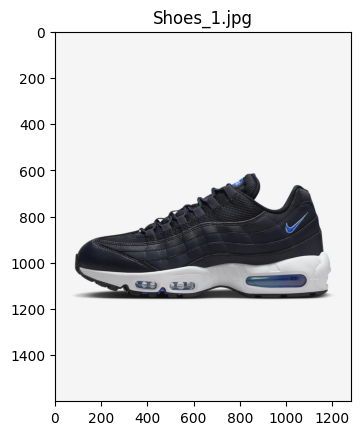

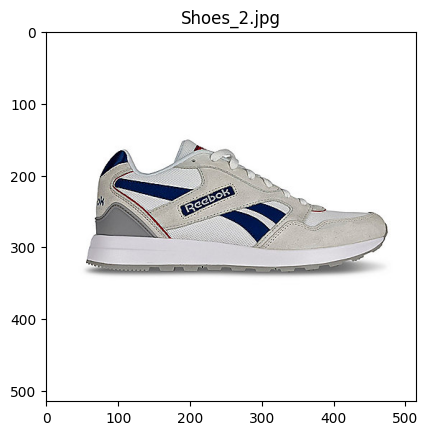

In [41]:
folder_path = r'C:\Users\TheoN\Neural Network'
files = os.listdir(folder_path)

image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')] #Merci ChatGPT
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(image_file)
    plt.show()

Image array <class 'numpy.ndarray'> (28, 28)
Ancienne database <class 'numpy.ndarray'> (28, 28)


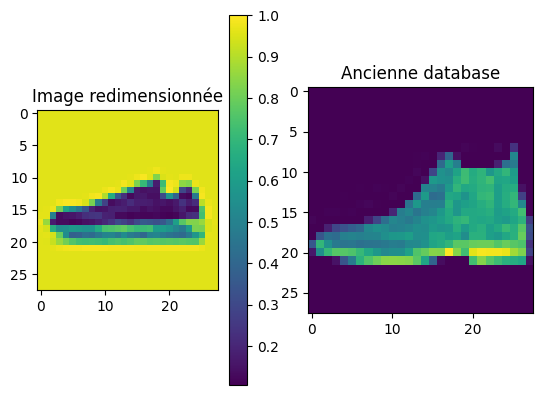

In [166]:
from PIL import Image

image_path = r'C:\Users\TheoN\Neural Network\Shoes_1.jpg'
image = Image.open(image_path)

# Redimensionner l'image en 28x28 pixels et normaliser 
image_resized = image.convert('L').resize((28,28))
image_array = np.array(image_resized)
image_array = image_array/255 #APRES 3H DE DEBUG, ELLE EST EN COULEUR LA PHOTO LA CON DE TA MERE

print('Image array',type(image_array),image_array.shape)
print('Ancienne database',type(test_images[0]),test_images[0].shape)

plt.subplot(1,2,1)
plt.imshow(image_array)
plt.colorbar()
plt.title('Image redimensionnée')
plt.subplot(1,2,2)
plt.imshow(test_images[0])
plt.title('Ancienne database')
plt.show()

#proba = probability_model.predict(test_images[0:2,:])
#print('finito')
#print(proba)
#proba2 = probability_model.predict(image_array)
#print(proba2)

VERIFICATION TAILLE DES IMAGES
Ancienne database <class 'numpy.ndarray'> (28, 28)
Image array <class 'numpy.ndarray'> (28, 28)
Image array <class 'numpy.ndarray'> (28, 28)
VERIFICATION IMAGE 1 ET 2
Ancienne database <class 'numpy.ndarray'> (10000, 28, 28)
Image_1 <class 'numpy.ndarray'> (28, 28)
Image_2 <class 'numpy.ndarray'> (28, 28)


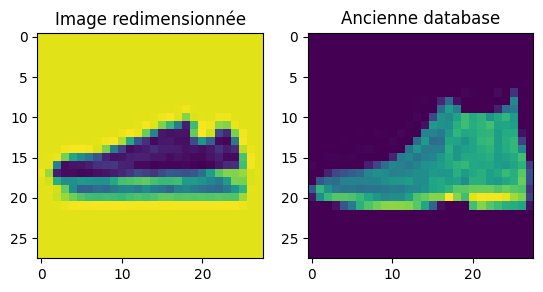

VERIFICATION AVANT DE RENTRER DANS LE MODELE
Ancienne database <class 'numpy.ndarray'> (10000, 28, 28)
New database <class 'numpy.ndarray'> (2, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.0000000e+00 0.0000000e+00 1.3699780e-07 2.4110627e-19 0.0000000e+00
  2.9797726e-29 5.1043640e-16 0.0000000e+00 9.9999988e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 5.3195923e-09 1.6560801e-18 0.0000000e+00
  1.6940565e-22 6.9314240e-07 0.0000000e+00 9.9999928e-01 2.7101055e-19]]
TEST
0
[0.0000000e+00 0.0000000e+00 1.3699780e-07 2.4110627e-19 0.0000000e+00
 2.9797726e-29 5.1043640e-16 0.0000000e+00 9.9999988e-01 0.0000000e+00]
7
Sneaker
1
[0.0000000e+00 0.0000000e+00 5.3195923e-09 1.6560801e-18 0.0000000e+00
 1.6940565e-22 6.9314240e-07 0.0000000e+00 9.9999928e-01 2.7101055e-19]
7
Sneaker
[7, 7]


In [229]:
from PIL import Image

print('VERIFICATION TAILLE DES IMAGES')
print('Ancienne database',type(test_images[0]),test_images[0].shape)

def Resized_image(image_path) : 
    image = Image.open(image_path)
    image_resized = image.convert('L').resize((28,28))
    image_array = np.array(image_resized)
    image_array = image_array/255 #APRES 3H DE DEBUG, ELLE EST EN COULEUR LA PHOTO LA CON DE TA MERE
    print('Image array',type(image_array),image_array.shape)
    return image_array


image_path = r'C:\Users\TheoN\Neural Network\Shoes_1.jpg'
image_1 = Resized_image(image_path)
image_path = r'C:\Users\TheoN\Neural Network\Shoes_2.jpg'
image_2 = Resized_image(image_path)

print('VERIFICATION IMAGE 1 ET 2')
print('Ancienne database',type(test_images),test_images.shape)
print('Image_1',type(image_1),image_1.shape)
print('Image_2',type(image_2),image_2.shape)

plt.subplot(1,2,1)
plt.imshow(image_1)
plt.title('Image redimensionnée')
plt.subplot(1,2,2)
plt.imshow(test_images[0])
plt.title('Ancienne database')
plt.show()

image_array = np.stack((image_1, image_2), axis=0)

print('VERIFICATION AVANT DE RENTRER DANS LE MODELE')
print('Ancienne database',type(test_images),test_images.shape)
print('New database',type(image_array),image_array.shape)

#proba = probability_model.predict(test_images[0:2,:])
#print('finito')
#print(proba)
predict_2 = probability_model.predict(image_array)
print(predict_2)

print('TEST')
cat_predict2 = []
for i in range (len(predict_2)):
    print(i)
    print(predict_2[i])
    print(np.argmax(predict_2[i])-1)
    print(class_names[np.argmax(predict_2[i])-1])
    cat_predict2.append(np.argmax(predict_2[i])-1)

print(cat_predict2)

In [230]:
from PIL import Image

print('VERIFICATION TAILLE DES IMAGES')
print('Ancienne database',type(test_images[0]),test_images[0].shape)

def Resized_image(image_path) : 
    image = Image.open(image_path)
    image_resized = image.convert('L').resize((28,28))
    image_array = np.array(image_resized)
    image_array = image_array/255 #APRES 3H DE DEBUG, ELLE EST EN COULEUR LA PHOTO LA CON DE TA MERE
    print('Image array',type(image_array),image_array.shape)
    return image_array


image_path = r'C:\Users\TheoN\Neural Network\Shoes_1.jpg'
image_1 = Resized_image(image_path)
image_path = r'C:\Users\TheoN\Neural Network\Shoes_2.jpg'
image_2 = Resized_image(image_path)

VERIFICATION TAILLE DES IMAGES
Ancienne database <class 'numpy.ndarray'> (28, 28)
Image array <class 'numpy.ndarray'> (28, 28)
Image array <class 'numpy.ndarray'> (28, 28)


Image array <class 'numpy.ndarray'> (28, 28)


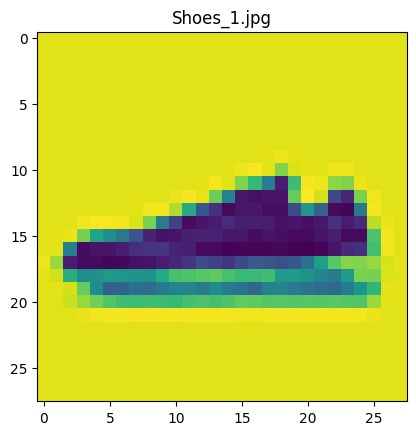

Image array <class 'numpy.ndarray'> (28, 28)


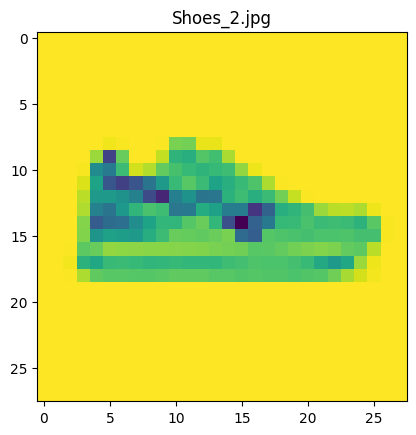

In [232]:
folder_path = r'C:\Users\TheoN\Neural Network'
files = os.listdir(folder_path)

image_array = [] 
image_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')] #Merci ChatGPT
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = Resized_image(image_path)
    plt.imshow(image)
    plt.title(image_file)
    plt.show()

#Il faut concatener 
